RNN을 이용한 텍스트 분류(Text Classification)

*   주어진 텍스트가 특정 카테고리에 속하는지 판별하는 문제
*   스펨 메일 필터링, 감성 분석, 뉴스기사 분류

1. RNN 개요
- 순환 신경망(Recurrent Neural Network, RNN)은 시퀀스 데이터를 처리하는 데
- 적합한 신경망 구조입니다. 기존의 신경망(예: MLP, CNN)은 입력이 독립적인
- 샘플로 구성되지만, RNN은 이전 시간 단계의 정보를 현재 단계에 전달할 수
- 있는 순환 구조를 갖고 있습니다.

- RNN은 다음과 같은 문제에서 많이 사용됩니다.

- 자연어 처리 (NLP)
  - 기계 번역
  - 감성 분석
  - 언어 모델링 및 텍스트 생성
- 시계열 분석
  - 주가 예측
  - 음성 신호 처리
- 기타
  - 비디오 프레임 예측
  - 음악 생성



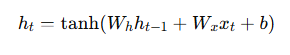

스펨메일

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

100%|██████████| 211k/211k [00:00<00:00, 41.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [6]:
from glob import glob
csv_path = glob(path+'/*')
csv_path

['/root/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1/spam.csv']

In [14]:
import pandas as pd
df = pd.read_csv(csv_path[0],encoding='ISO-8859-1')
print(len(df))
df.head()

5572


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
# 불필요한 열을  삭제
data = df[['v1','v2']]
data.rename(columns={'v1':'label','v2':'text'},inplace=True)
data.head()

<ipython-input-16-522e9cb563a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'v1':'label','v2':'text'},inplace=True)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# 레이블을 숫자로 변환
data['label'] = data['label'].map({'ham':0,'spam':1})
data.head()

<ipython-input-18-da301bcb2f82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham':0,'spam':1})


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# 중복데이터 제거
data.drop_duplicates(subset=['text'],inplace=True)
print(len(data))

5169


<ipython-input-19-229ac3f800d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset=['text'],inplace=True)


In [21]:
5572-5169

403

In [22]:
# 훈련/ 테스트  데이터 분리(8:2)
X_train,X_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2,random_state=0,stratify=data['label'])

# 토큰화 및 정수 인코딩

텍스트 데이터를 수치 데이터로 변환

In [23]:
#토큰화 및 정수 인코딩
tokenizer =  Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

#단어 집합 크기 확인
vocab_size = len(tokenizer.word_index)+1  # 패딩을 위한 +1
print(f'단어 집합의 크기 : {vocab_size}')

단어 집합의 크기 : 7822


# 패딩 적용
  - 시퀀스 길이 맞추기

In [30]:
# 최대 길이 설정
max_len =  max([len(x) for x in X_train_encoded])   # 189

# 패딩적용
X_train_padded = pad_sequences(X_train_encoded,maxlen=max_len,padding='post')
X_test_padded = pad_sequences(X_test_encoded,maxlen=max_len,padding='post')

print(f'훈련 데이터 크기: {X_train_padded.shape}')
print(f'테스트 데이터 크기: {X_test_padded.shape}')

훈련 데이터 크기: (4135, 189)
테스트 데이터 크기: (1034, 189)


In [29]:
X_train_padded

array([[ 102,    1,  210, ...,    0,    0,    0],
       [   1,   59,    8, ...,    0,    0,    0],
       [ 157,  180,   12, ...,    0,    0,    0],
       ...,
       [1020,   23,    3, ...,    0,    0,    0],
       [ 340,  824,   10, ...,    0,    0,    0],
       [ 539, 1169,   36, ...,    0,    0,    0]], dtype=int32)

RNN 모델 구축 및 학습

In [71]:
from tensorflow.keras.models import Sequential  #  레이들의 합치
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense  # 벡터, RNN을 구현한 레이어, 밀집레이어

# 하이퍼 파라메터 설정
embedding_dim = 72  # 임베딩 차원
hidden_units = 72 # 은닉층 크기
batch_size = 80 # 배치 크기
epochs = 10 # 학습 반복 횟수

# RNN 모델 구성
model = Sequential([
    Embedding(input_dim = vocab_size,output_dim=embedding_dim, input_length = max_len),  # 단어를 저차원 벡터로 변환
    SimpleRNN(hidden_units, return_sequences=False),  # 학습  시퀀스 데이터를 처리하고 은닉상태를 학습
    Dense(1,activation='sigmoid')  # 판별  이진분류를위해서 시그모이드
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train_padded,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.8767 - loss: 0.4534 - val_accuracy: 0.8779 - val_loss: 0.3717
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.8830 - loss: 0.3633 - val_accuracy: 0.8779 - val_loss: 0.3737
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8735 - loss: 0.3818 - val_accuracy: 0.8779 - val_loss: 0.3715
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.8769 - loss: 0.3749 - val_accuracy: 0.8779 - val_loss: 0.3721
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.8646 - loss: 0.3969 - val_accuracy: 0.8779 - val_loss: 0.3785
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8752 - loss: 0.3826 - val_accuracy: 0.8779 - val_loss: 0.3711
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8787 - loss: 0.3698 - val_accuracy: 0.8779 - val_loss: 0.3712
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8706 - loss: 0.3857 - val_accuracy: 0.8779 - val_loss: 

In [72]:
# 테스트 데이터 평가
loss,accuracy =  model.evaluate(X_test_padded, y_test)
print(f'테스트 정확도 : {accuracy:.4f}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8755 - loss: 0.3760
테스트 정확도 : 0.8733


영어문장 하나를 만들어서 스펨여부 확인

In [73]:
X_test.tolist()[2], y_test.tolist()[2]

('Someonone you know is trying to contact you via our dating service! To find out who it could be call from your mobile or landline 09064015307 BOX334SK38ch ',
 1)

In [74]:
sample = [X_test.tolist()[2]]
# 토크나이져를 이용해서 정수 인코딩
new_text_encoded = tokenizer.texts_to_sequences(sample)
print(new_text_encoded)
# 패딩적용
new_text_padded = pad_sequences(new_text_encoded,maxlen=max_len,padding='post')
print(new_text_padded)
#  모델 예측
prediction = model.predict(new_text_padded)
print(f' 예측 : {prediction[0][0]:.2f}')
if prediction[0][0] >= 0.5:
  print("스펨메일")
else:
  print("정상메일")

[[3, 52, 9, 305, 2, 219, 3, 1153, 94, 854, 286, 2, 179, 51, 151, 14, 211, 33, 18, 48, 13, 106, 27, 420]]
[[   3   52    9  305    2  219    3 1153   94  854  286    2  179   51
   151   14  211   33   18   48   13  106   27  420    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0

In [75]:
history.history['accuracy']

[0.8715235590934753,
 0.8727327585220337,
 0.8727327585220337,
 0.8727327585220337,
 0.8727327585220337,
 0.8727327585220337,
 0.8727327585220337,
 0.8727327585220337,
 0.8727327585220337,
 0.8727327585220337]

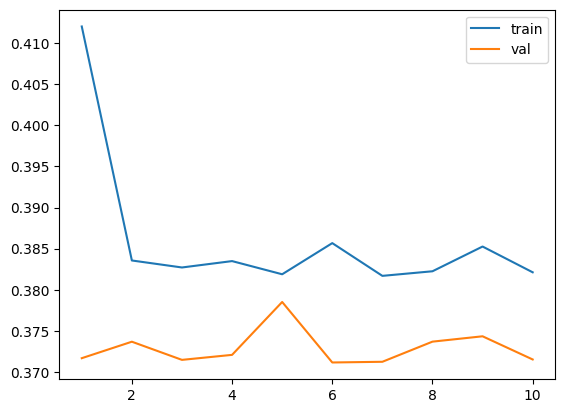

In [77]:
import numpy as np
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['loss']) +1 )
plt.plot(epochs,history.history['loss'], label = 'train')
plt.plot(epochs,history.history['val_loss'], label='val')
plt.legend()
plt.show()

LSTM 이용한 로이터 뉴스 데이터 카테고리 분류

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [79]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=None, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [85]:
len(set(y_train)) , len(X_train), len(X_test)

(46, 8982, 2246)

In [87]:
print(X_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


1. 데이터 이해 및 전처리
  - reuters.load_data()를 사용하여 **로이터 뉴스 기사 데이터(11,258개)**를 로드.
  - 뉴스 기사는 총 46개 카테고리로 분류됨.
  - 단어 빈도수를 기준으로 정수 인코딩된 형태.
  - 뉴스 기사의 길이를 맞추기 위해 pad_sequences()로 패딩 적용.
  - 원-핫 인코딩(to_categorical())을 통해 레이블을 변환.
2. LSTM 모델 구성
  - 단어 임베딩(Embedding) → LSTM 계층(LSTM) → 출력층(Dense) 구조.
  - softmax 활성화 함수를 사용하여 다중 클래스 분류 수행.
  - categorical_crossentropy 손실 함수와 adam 옵티마이저 적용.
3. 모델 학습 및 평가
  - EarlyStopping을 사용해 과적합 방지.
  - ModelCheckpoint를 활용해 최고 성능 모델 저장.
  - 모델 학습 후 evaluate()로 테스트 정확도 확인.

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# 데이터 로드 및 전처리
vocab_size = 2000
max_len = 150
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)
X_train = pad_sequences(X_train,maxlen=max_len,padding='post')
X_test = pad_sequences(X_test,maxlen=max_len,padding='post')
num_classes = len(set(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 구성
embedding_dim = 256
hidden_units = 256


model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),  # 벡터화
    Bidirectional(LSTM(hidden_units, return_sequences=True)),  # 양방향.. 더많은 문맥정보 학습
    BatchNormalization(),  # 학습 안정화
    Dropout(0.3),  # 과 적합 방지
    LSTM(hidden_units),  # 장단기 메모리  RNN 개선
    BatchNormalization(), # 학습 안정화
    Dropout(0.3),# 과 적합 방지
    Dense(128, activation='relu'),  # FC 완전연결층
    BatchNormalization(),# 학습 안정화
    Dropout(0.3),# 과 적합 방지
    Dense(num_classes, activation='softmax')  # 분류
])

# 모델 컴파일 학습
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# 학습률을 자동으로 감소시키는 keras의 콜백함수 : 모델이 일정시간동안 개선되지 않으면 학습률을 조정 최적의 학습 속도 유지
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = model.fit(X_train, y_train, batch_size=128, epochs=3, validation_data=(X_test, y_test), callbacks=[es, mc, lr])

Epoch 1/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2109 - loss: 4.0205
Epoch 1: val_accuracy improved from -inf to 0.44212, saving model to best_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 443s 6s/step - accuracy: 0.2119 - loss: 4.0151 - val_accuracy: 0.4421 - val_loss: 2.7318 - learning_rate: 0.0010
Epoch 2/3
33/71 ━━━━━━━━━━━━━━━━━━━━ 3:45 6s/step - accuracy: 0.4222 - loss: 2.7492

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('best_model.keras')
print("\n테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))